### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [5]:
#Combining these 3 colu
data['distance_to_coffeeshop'] = data[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum(axis=1).map({
    1: "5 min or less",
    2: "5 to 15 min",
    3: "15 min or more"
})
data.info()
data = data.drop(columns=['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   destination             12684 non-null  object
 1   passanger               12684 non-null  object
 2   weather                 12684 non-null  object
 3   temperature             12684 non-null  int64 
 4   time                    12684 non-null  object
 5   coupon                  12684 non-null  object
 6   expiration              12684 non-null  object
 7   gender                  12684 non-null  object
 8   age                     12684 non-null  object
 9   maritalStatus           12684 non-null  object
 10  has_children            12684 non-null  int64 
 11  education               12684 non-null  object
 12  occupation              12684 non-null  object
 13  income                  12684 non-null  object
 14  car                     108 non-null    object
 15  Ba

In [6]:
ans = data.query('direction_same == direction_opp')
ans

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_same,direction_opp,Y,distance_to_coffeeshop


ABove would indicate direction same and direction opposite, booleans, are mirrors of each other, so only one is necessary. Before deleting one of them, also will check if either have nulls in them, as well as null values in other columns.

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
null_counts = data.isnull().sum()
null_counts = null_counts[null_counts>0]
print(null_counts)

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


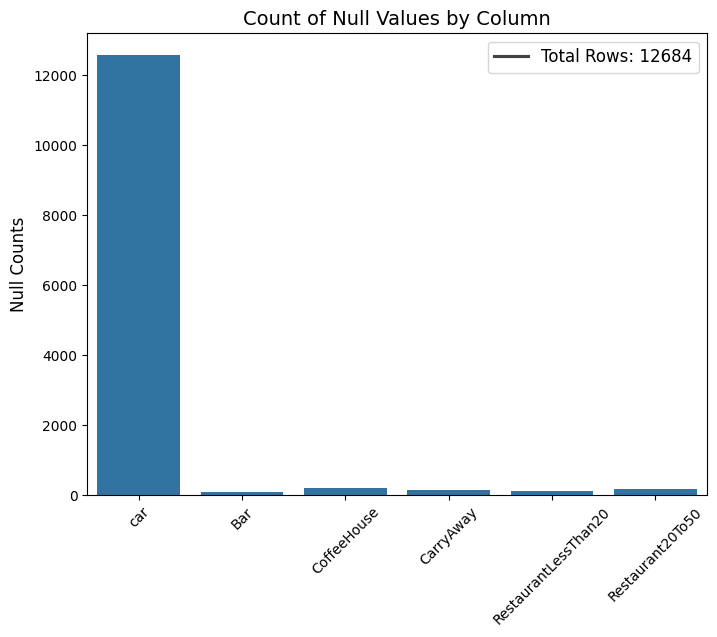

In [8]:
plt.figure(figsize=(8, 6))
sns.barplot(x=null_counts.index, y=null_counts.values,)

# Add labels and title
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Null Counts', fontsize=12)
plt.title('Count of Null Values by Column', fontsize=14)
plt.legend([f"Total Rows: {data.shape[0]}"], loc='upper right', fontsize=12)
# Display the bar chart
plt.show()

As can be seen from above, the car column has almost all values as null, and also same direction and opposite direction are mirrors of each other, so the car and opposite direction columns can be dropped.

In [9]:
data.drop(columns=['car','direction_opp'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   destination             12684 non-null  object
 1   passanger               12684 non-null  object
 2   weather                 12684 non-null  object
 3   temperature             12684 non-null  int64 
 4   time                    12684 non-null  object
 5   coupon                  12684 non-null  object
 6   expiration              12684 non-null  object
 7   gender                  12684 non-null  object
 8   age                     12684 non-null  object
 9   maritalStatus           12684 non-null  object
 10  has_children            12684 non-null  int64 
 11  education               12684 non-null  object
 12  occupation              12684 non-null  object
 13  income                  12684 non-null  object
 14  Bar                     12577 non-null  object
 15  Co

As you can see, the above has save us .2MB of memory.

Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
dtype: int64


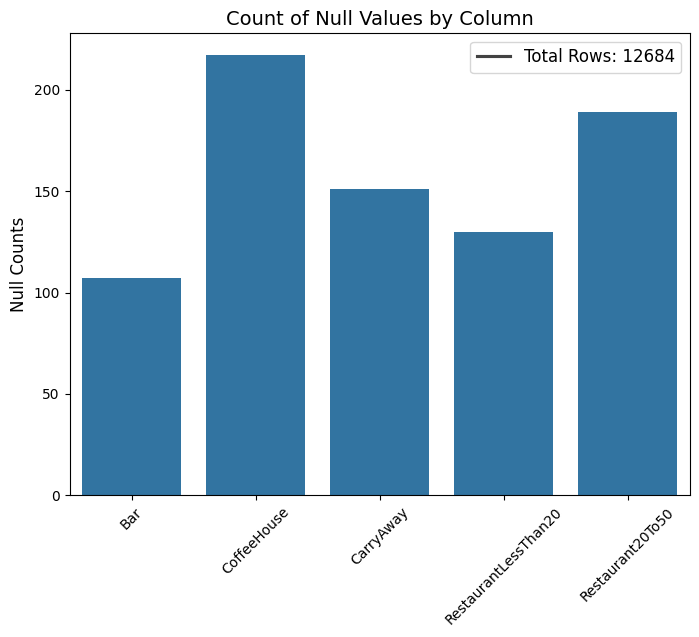

In [10]:
null_counts = data.isnull().sum()
null_counts = null_counts[null_counts>0]
print(null_counts)
plt.figure(figsize=(8, 6))
sns.barplot(x=null_counts.index, y=null_counts.values,)
# Add labels and title
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Null Counts', fontsize=12)
plt.title('Count of Null Values by Column', fontsize=14)
plt.legend([f"Total Rows: {data.shape[0]}"], loc='upper right', fontsize=12)
# Display the bar chart
plt.show()

One obvious replacement for null value is in the bar column. If age less than 21, we can assume driver never goes to bar.

In [11]:
result = data.query('Bar != Bar and age=="below21"')
print(result)

Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, direction_same, Y, distance_to_coffeeshop]
Index: []

[0 rows x 22 columns]


Disappointingly, there are no rows where Bar is null and age is less than 21, so my thought was not rewarded.

In order to have clean data for this model, I will drop all rows that have a null value. 

In [12]:
print(f"Original number of rows {data.shape[0]}")
data.dropna(inplace=True)
print(f"New number of rows {data.shape[0]}")

Original number of rows 12684
New number of rows 12079


4. What proportion of the total observations chose to accept the coupon?



The total rate of acceptance across all coupons is 0.5693352098683666


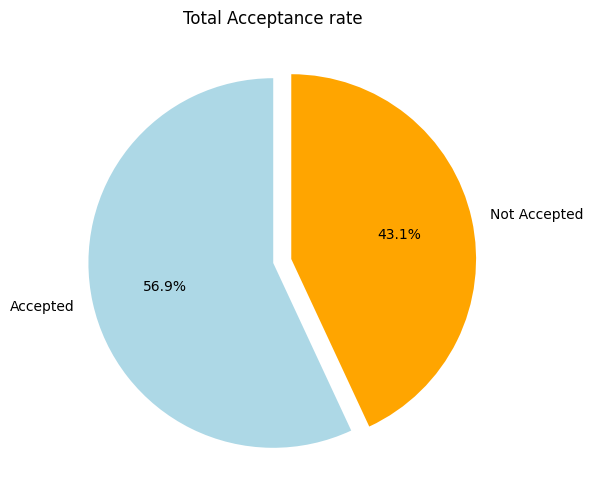

In [13]:
rate_of_acceptance=data['Y'].mean()
print(f"The total rate of acceptance across all coupons is {rate_of_acceptance}")

ser = pd.Series([rate_of_acceptance,1-rate_of_acceptance])

plt.figure(figsize=(6, 6))
plt.pie(
    ser,
    labels=['Accepted', 'Not Accepted'],  # Order matches value_counts
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'orange'],
    explode=[0, 0.1]  # Highlight the 'True' slice
)
plt.title('Total Acceptance rate')
plt.show()







5. Use a bar plot to visualize the `coupon` column.

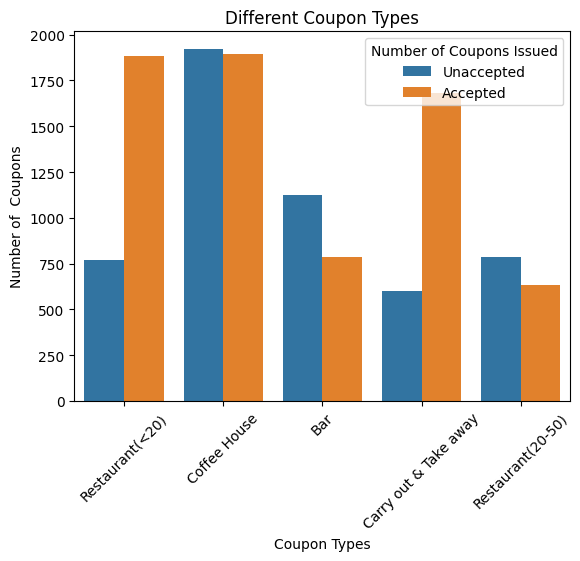

In [14]:
sns.countplot(x='coupon', data=data, hue='Y')

# Display the plot
plt.legend(title='Number of Coupons Issued', labels=['Unaccepted', 'Accepted'])  # Replace 'False' and 'True' with appropriate labels
plt.title('Different Coupon Types')
plt.xlabel('Coupon Types')
plt.ylabel('Number of  Coupons')
plt.xticks(rotation=45)
plt.show()




6. Use a histogram to visualize the temperature column.

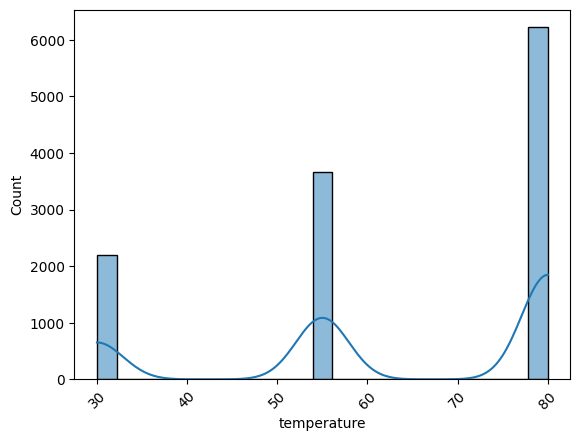

In [15]:
sns.histplot(data=data, x='temperature', kde=True)
    
# Display the plot
plt.xticks(rotation=45)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
barcoupdata=data.query('coupon=="Bar"')


2. What proportion of bar coupons were accepted?


Proportion of bar coupons that were accepted against those offered was 0.41191845269210664


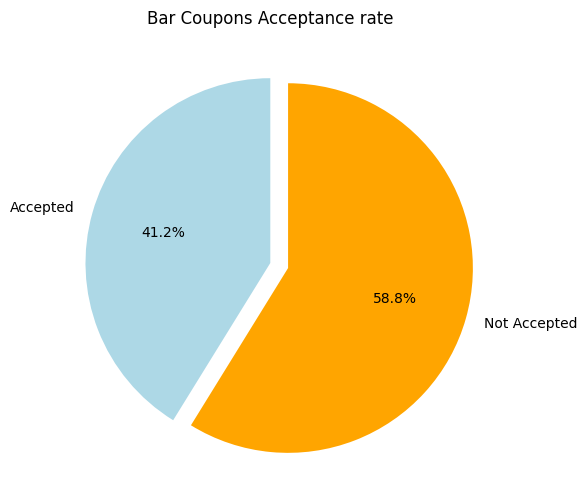

In [17]:

Proportions=barcoupdata['Y'].mean() 
print(f"Proportion of bar coupons that were accepted against those offered was {Proportions}")

ser = pd.Series([Proportions,1-Proportions])

plt.figure(figsize=(6, 6))
plt.pie(
    ser,
    labels=['Accepted', 'Not Accepted'],  # Order matches value_counts
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'orange'],
    explode=[0, 0.1]  # Highlight the 'True' slice
)
plt.title('Bar Coupons Acceptance rate')
plt.show()



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
#Acceptance rate of thos who go to bar 3 or fewer times a month
acceptance_rate_3_or_fewer_better =  barcoupdata.query('(Bar=="1-3" or Bar=="never" or Bar=="less1")')['Y'].mean()
acceptance_rate_more_better = barcoupdata.query('(Bar=="4~8" or Bar=="gt8")')['Y'].mean()
print(f"The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more is {acceptance_rate_3_or_fewer_better} vs {acceptance_rate_more_better}")

The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more is 0.2953020134228188 vs 0.7616580310880829


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [19]:
acceptance_rate_a = barcoupdata.query('((Bar=="1-3" or Bar=="4-8" or Bar=="gt8") and (age != "21" and age != "below21" ))')['Y'].mean()
acceptance_rate_b = barcoupdata.query('not ((Bar=="1-3" or Bar=="4-8" or Bar=="gt8") and (age != "21" and age != "below21" ))')['Y'].mean()
print(f"The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others {acceptance_rate_a} vs {acceptance_rate_b}")

The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others 0.7 vs 0.4073287307488051


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [20]:
acceptance_rate_a1 = barcoupdata.query('((Bar=="1-3" or Bar=="4-8" or Bar=="gt8") and (passanger != "Kid(s)") and ( occupation!="Farming Fishing & Forestry" ) )')['Y'].mean()
print(f"Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is {acceptance_rate_a1}")

acceptance_rate_a2 = barcoupdata.query('not ((Bar=="1-3" or Bar=="4-8" or Bar=="gt8") and (passanger != "Kid(s)") and ( occupation!="Farming Fishing & Forestry" ) )')['Y'].mean()
print(f"Acceptance rate of drivers who who are not in above category is {acceptance_rate_a2}")



Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 0.7111111111111111
Acceptance rate of drivers who who are not in above category is 0.40471092077087795


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [21]:

acceptance_rate_a = barcoupdata.query('((Bar=="1-3" or Bar=="4-8" or Bar=="gt8") and (passanger != "Kid(s)" and passanger !="Alone" ) and ( maritalStatus!="Widowed" ) )')['Y'].mean()
print(f"Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is {acceptance_rate_a}")

acceptance_rate_b = barcoupdata.query('((Bar=="1-3" or Bar=="4-8" or Bar=="gt8") and (age =="21" or age == "26" ))')['Y'].mean()
print(f"Acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is {acceptance_rate_b}")

acceptance_rate_c = barcoupdata.query('((RestaurantLessThan20=="4~8" or RestaurantLessThan20=="gt8") and (income =="Less than $12500" or income =="$12500 - $24999" or income =="$25000 - $37499" or income =="$37500 - $49999" ))')['Y'].mean()
print(f"Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is {acceptance_rate_c}")


Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 0.6842105263157895
Acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is 0.8333333333333334
Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

To summarize the findings Of Bar Coupons

- The total rate of acceptance across all coupons is 0.5693352098683666. Proportion of bar coupons that were accepted against those offered was 0.41191845269210664

- The acceptance rate between those who went to a bar 3 or fewer times a month to those who went more is 0.2953020134228188 vs 0.7616580310880829

- The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others 0.7 vs 0.4073287307488051

- Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 0.7111111111111111. Acceptance rate of drivers who who are not in above category is 0.40471092077087795

- Acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 0.6842105263157895
- Acceptance rate of drivers who go to bars more than once a month and are under the age of 30 is 0.8333333333333334
- Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is 0.45645645645645644

Conclusions

Bar coupons are selected about 40% of the time when they are issued. I presume the business objective is to target the coupons more accurately, to get the acceptance rate up. looking at the data I would do this by 

- Only issuing coupons to people who go to bars more than 3 times a month
- Issue more coupons to those between the ages of 25 and 30

It is interesting that those with lower income and eat more at cheaper restaurants do not use bar coupons much more than the average. Which indicates income level is not a factor for bar coupon use.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I am going to investigate the profiles of those who accept the coffee house voucher. Looking at the above Different Coupon Types bar plot, seems the acceptance level is apporximately 50-50.

I will create a dataset of Coffee House Coupons. I will then delete the coupon column as no longer needed.

In [22]:
coffeecoup=data.query('coupon=="Coffee House"')

In [23]:
CoffeeProp=coffeecoup['Y'].mean() 
print(f"Proportion of Coffee coupons that were accepted against those offered was {CoffeeProp}")

Proportion of Coffee coupons that were accepted against those offered was 0.49633123689727465


Let's look at how the income levels affect acceptance.

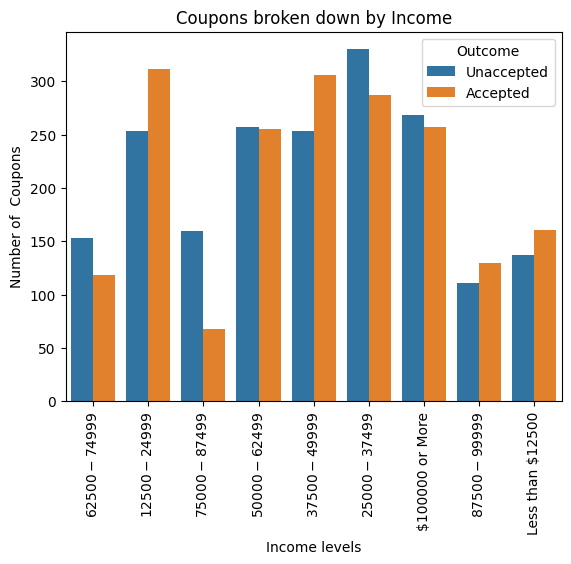

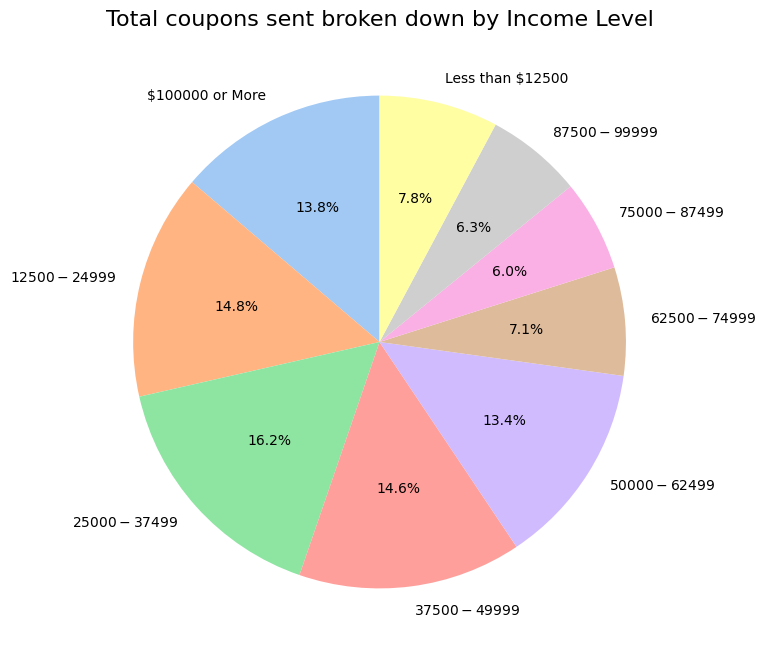

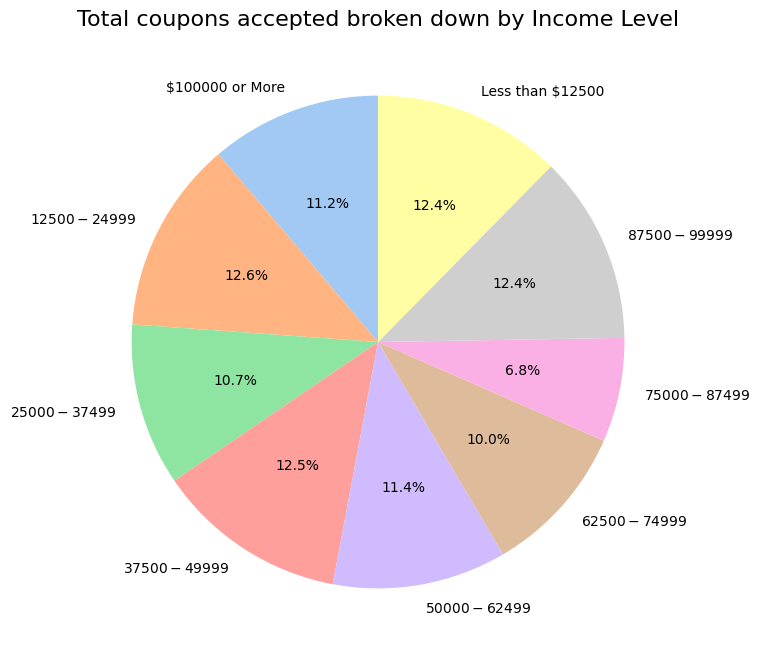

In [24]:
sns.countplot(x='income', data=coffeecoup, hue='Y')

# Display the plot
plt.legend(title='Outcome', labels=['Unaccepted', 'Accepted'])  # Replace 'False' and 'True' with appropriate labels
plt.title('Coupons broken down by Income')
plt.xlabel('Income levels')
plt.ylabel('Number of  Coupons')
plt.xticks(rotation=90)
plt.show()

acceptance_rates = [coffeecoup.groupby('income')['Y'].count(),coffeecoup.groupby('income')['Y'].mean()]
# Create the pie chart
i=0
for acceptance_rate in acceptance_rates:
    plt.figure(figsize=(8, 8))
    colors = sns.color_palette('pastel')
    plt.pie(
    acceptance_rate,
    labels=acceptance_rate.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
    )
    if i==0:
        plt.title('Total coupons sent broken down by Income Level', fontsize=16)
    else:
        plt.title('Total coupons accepted broken down by Income Level', fontsize=16) 
    i=i+1
    plt.show()

Interestingly, the amount of coupons sent to the three levels of incomes in spread $60,000 up to $100,000 seems less than 
all the other income groups. Also, one group immediately jumps out as being of interest. The acceptance rate of those with income
levels between $75,000 and $87,500 is a lot less than the acceptance rates of the other groups. Let's see if we can find out why.

In [25]:
acceptance_rate_income = coffeecoup.query('income=="$75000 - $87499"')['Y'].mean()
print(f"Acceptance rate of drivers whose income between $75000-$87499 is {acceptance_rate_income}")


Acceptance rate of drivers whose income between $75000-$87499 is 0.2982456140350877


So will look at counts for each column where it is possible for the business to know the data about the driver and conditions during time coupon is sent. I will leave  out the 'Passanger' column, as that is something business cannot know at time of journey. Also, will leave out data where a person never goes to a Coffee House, as they will never use a voucher regardless of the conditions when it was sent. Finally, I will leave out some columns where data is irrlevant to coffee house visits, such as number of bar and restaurant visits.

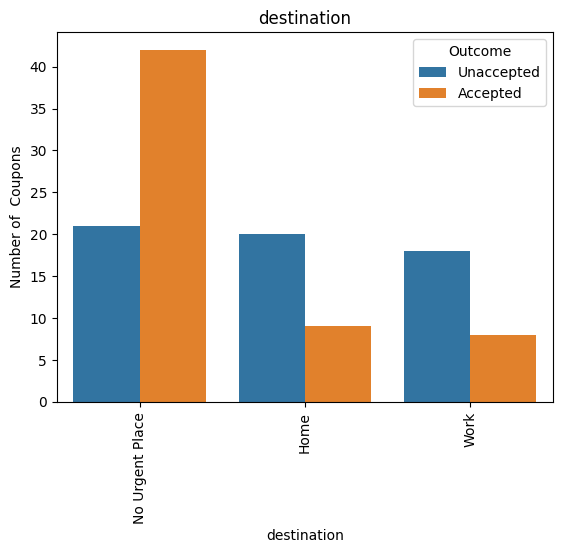

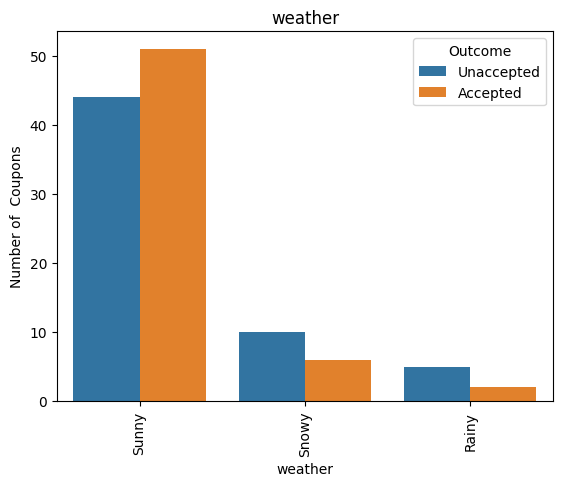

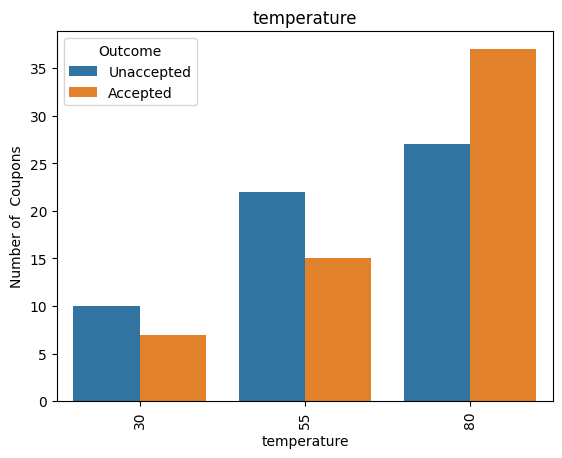

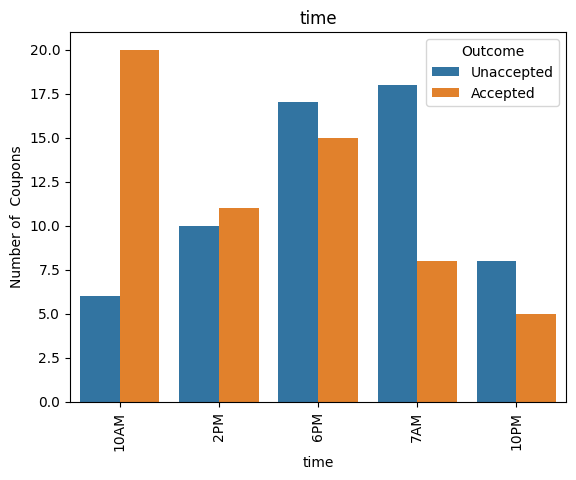

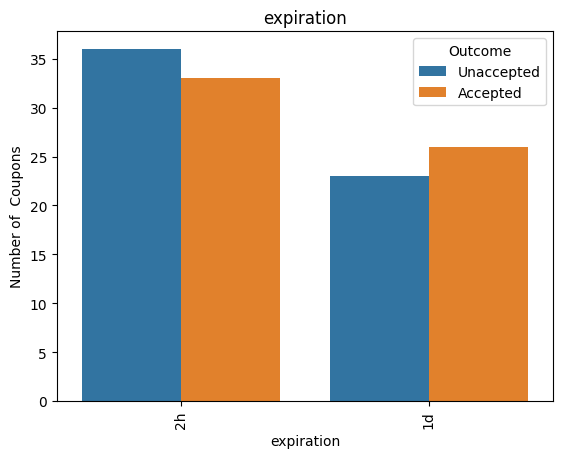

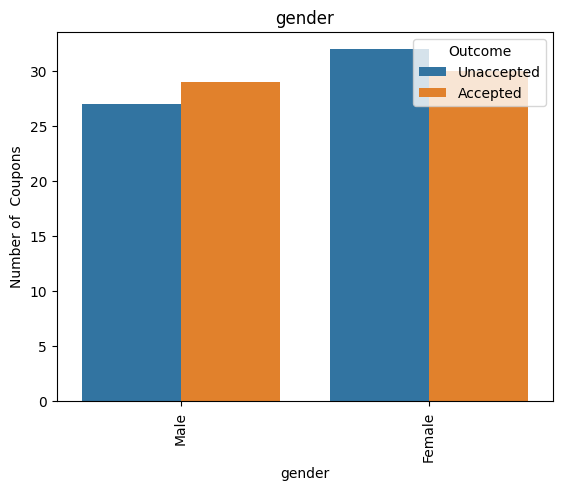

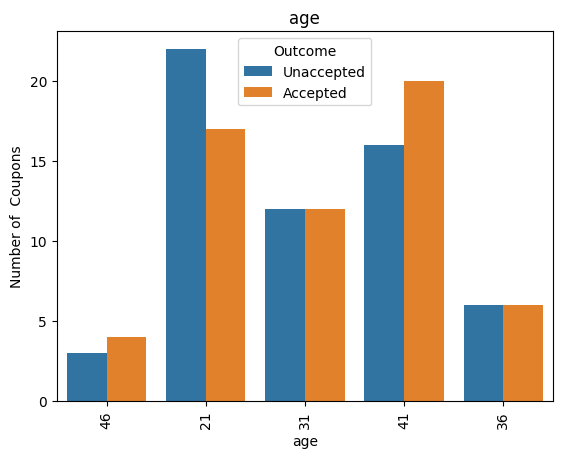

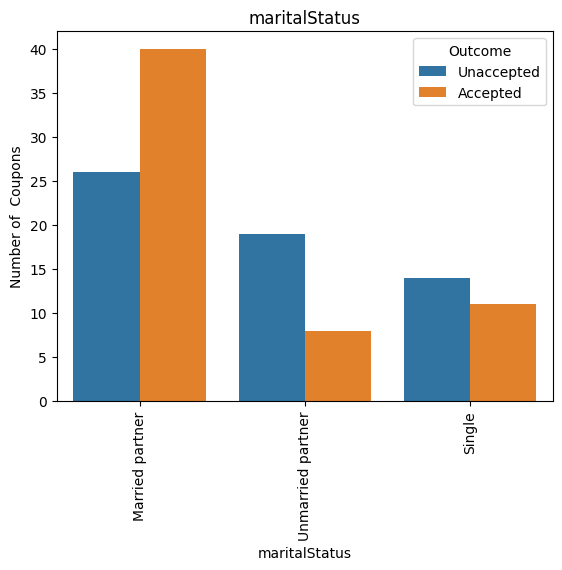

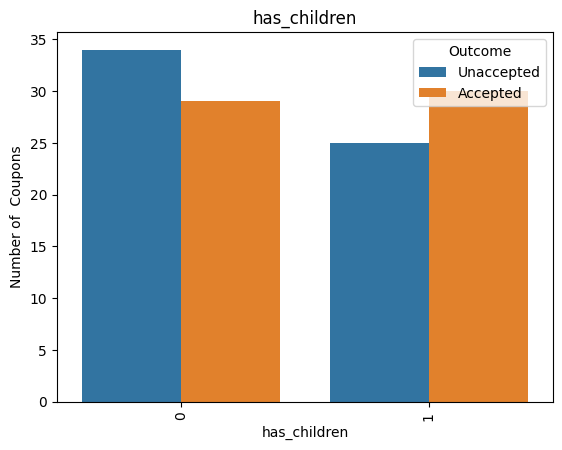

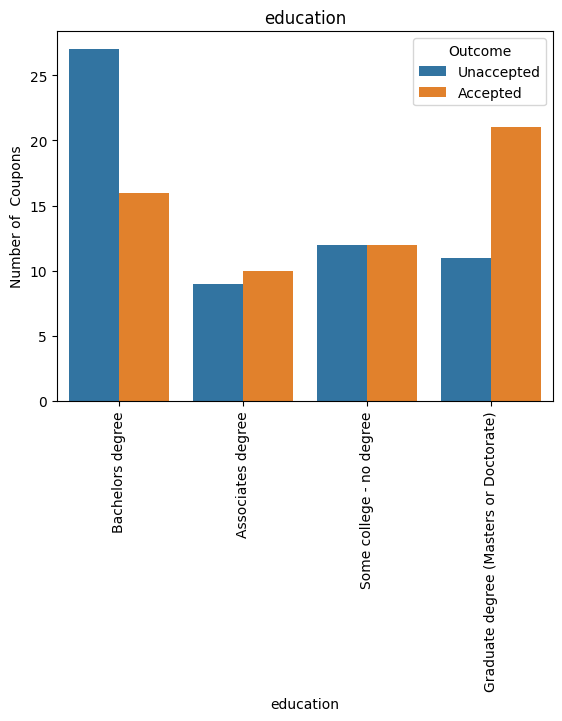

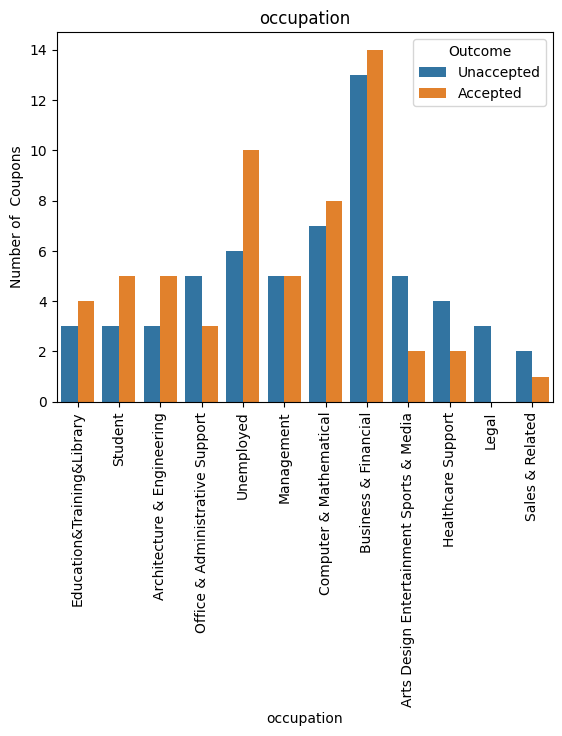

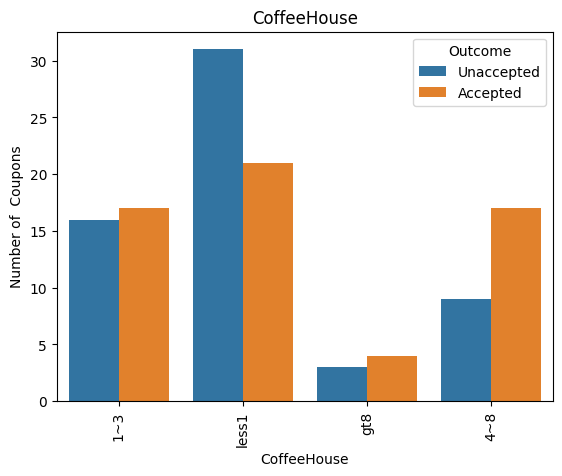

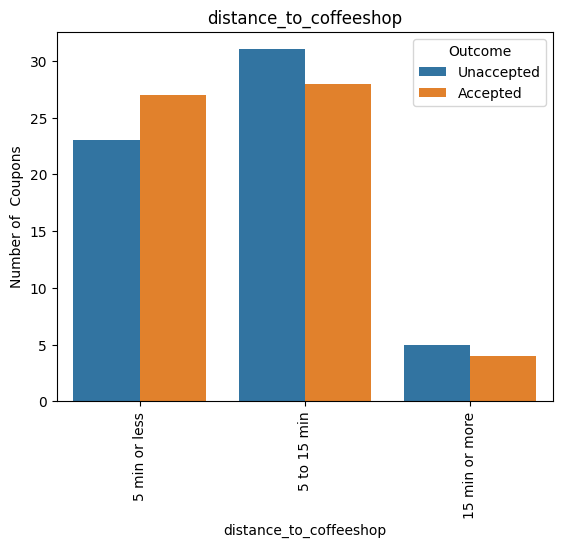

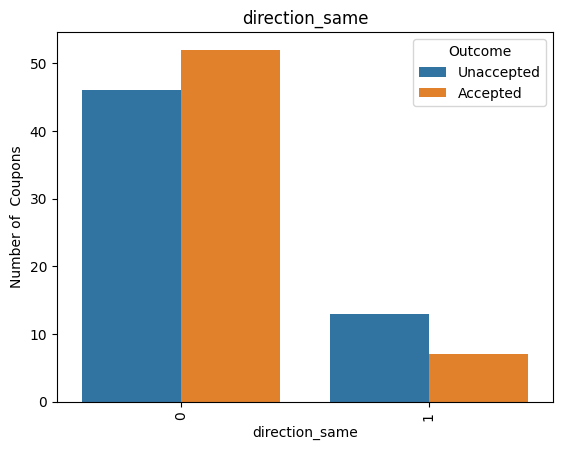

In [26]:



income_filtered=coffeecoup.query('(income=="$75000 - $87499") and (CoffeeHouse!="never")')


##coffeecoup['sum'] = coffeecoup[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].sum(axis=1)

# Map the sum to the desired labels



columns_to_plot = ['destination',
'weather',
'temperature',
'time',
'expiration',
'gender',
'age',
'maritalStatus',
'has_children',
'education',
'occupation',
'CoffeeHouse',
'distance_to_coffeeshop',
'direction_same']
for column in columns_to_plot:
    sns.countplot(x=column, data=income_filtered, hue='Y')
    plt.legend(title='Outcome', labels=['Unaccepted', 'Accepted'])
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Number of  Coupons')
    plt.xticks(rotation=90)
    plt.show()

Acceptance rate when it is good weather and time either 10AM and 2PM, and person not on way to work 0.5891472868217055
Acceptance rate when it is good weather and time either 10AM and 2PM, and person not on way to work and go to Coffeehouse 4 or more times 0.7673469387755102


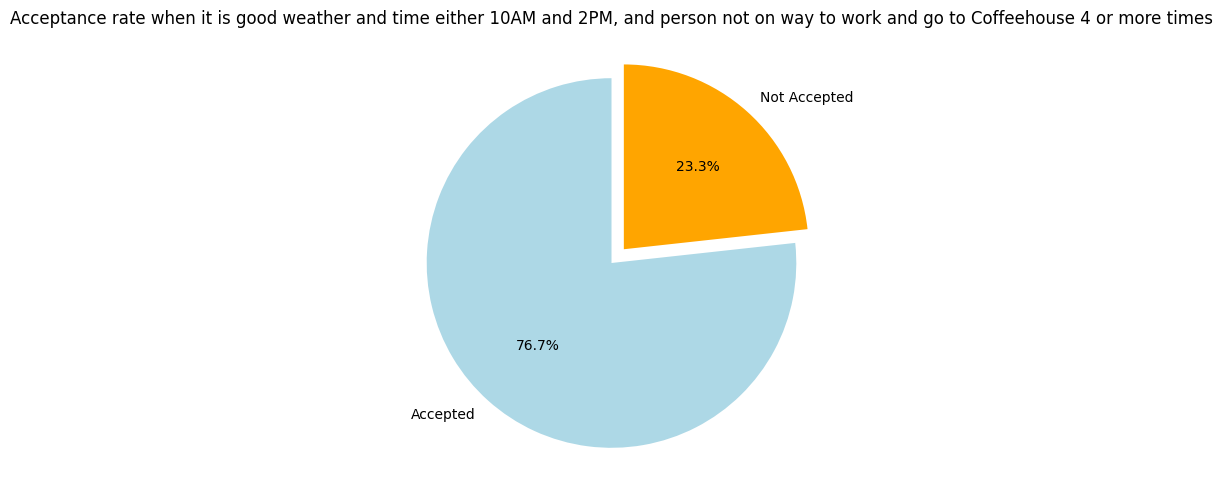

In [27]:
acceptance_rate = coffeecoup.query('(destination=="No Urgent Place") and (weather=="Sunny") and (temperature==80) and (time=="10AM" or time=="2PM")')['Y'].mean()
print(f"Acceptance rate when it is good weather and time either 10AM and 2PM, and person not on way to work {acceptance_rate}")
acceptance_rate = coffeecoup.query('(destination=="No Urgent Place") and (weather=="Sunny") and (temperature==80) and (time=="10AM" or time=="2PM") and (CoffeeHouse=="4~8" or CoffeeHouse=="gt8")')['Y'].mean()
print(f"Acceptance rate when it is good weather and time either 10AM and 2PM, and person not on way to work and go to Coffeehouse 4 or more times {acceptance_rate}")

ser = pd.Series([acceptance_rate,1-acceptance_rate])

plt.figure(figsize=(6, 6))
plt.pie(
    ser,
    labels=['Accepted', 'Not Accepted'],  # Order matches value_counts
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightblue', 'orange'],
    explode=[0, 0.1]  # Highlight the 'True' slice
)
plt.title('Acceptance rate when it is good weather and time either 10AM and 2PM, and person not on way to work and go to Coffeehouse 4 or more times')
plt.show()






To summarize the findings Of Coffee Coupons

Proportion of Coffee coupons that were accepted against those offered was 0.49633123689727465

When broken down by income level, accceptance rate of drivers whose income between $75000-$87499 is 0.2982456140350877

In order to investigate why this is, I looked at the acceptance rate at each factor that I thought could have a bearing for people within this range. The reults that stood out were:
    - The acceptance rate for those with no particular destination was high compared to those going to work
    - The acceptance rate is high when it is sunny and temperature over 80 degrees
    - The acceptance rate is high when at 10am and 2pm
    - The acceptance rate is high when they are married and have a graduate degree
    - The acceptance rate is high when they have 4-8 coffeeeshop visits a month
    - Surprisingly distance to coffee shop or if in direction of travel does not seem to make too much difference.

Finally, having dug down into the data for this income group, I examined if filtering above across all income levels could significantly increase acceptance rate.

    - Acceptance rate when it is good weather and time either 10AM and 2PM, and person not on way to work 0.5891472868217055
    - Acceptance rate when it is good weather and time either 10AM and 2PM, and person not on way to work and go to Coffeehouse 4 or more times 0.7673469387755102

Conclusions

It seems thate the dominating factor for coffeehouse coupon usage is how often a person goes to a coffeehouse and acceptance rate gets higher than average if they go 4 or more times in a month. Also, time of day and weather have an impact. It may be that Marital Status and Education level could also have an impact, but it would be a tricky road for a business to go down to discriminate coupon distribution to those demographics.  